<a href="https://colab.research.google.com/github/Rok-sana/ML-course/blob/main/Homework_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import(MinMaxScaler,
                                  StandardScaler,
                                  LabelEncoder)

from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import (KMeans,
                             AgglomerativeClustering)

from scipy.cluster import hierarchy   
%matplotlib inline   
from IPython.display import display
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

In [ ]:
df = pd.read_csv("SouthGermanCredit.asc", sep=' ')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
columns =['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']

In [ ]:
df.columns = columns

In [ ]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [ ]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


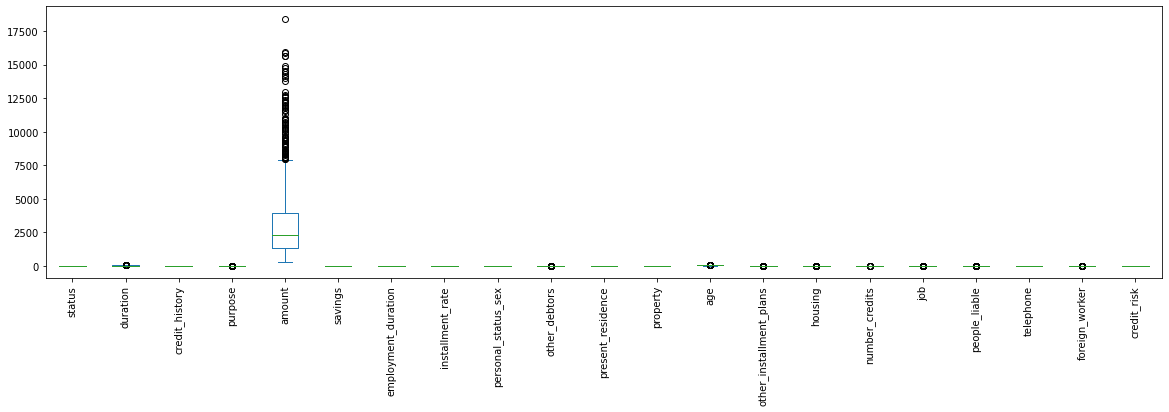

In [ ]:
df.plot.box(figsize=(20,5), rot=90)

In [ ]:
num_columns = ['duration','age','amount']

In [ ]:
df = df.astype(str)

In [ ]:
df[num_columns] = df[num_columns].astype(int)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
age,1000.0,35.542,11.352670,19.0,27.0,33.0,42.00,75.0


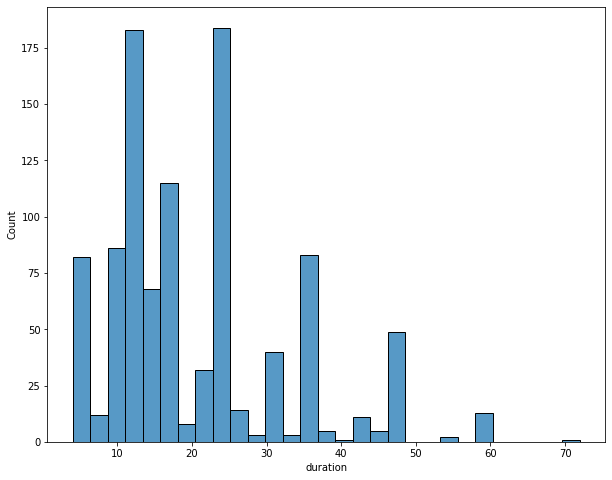

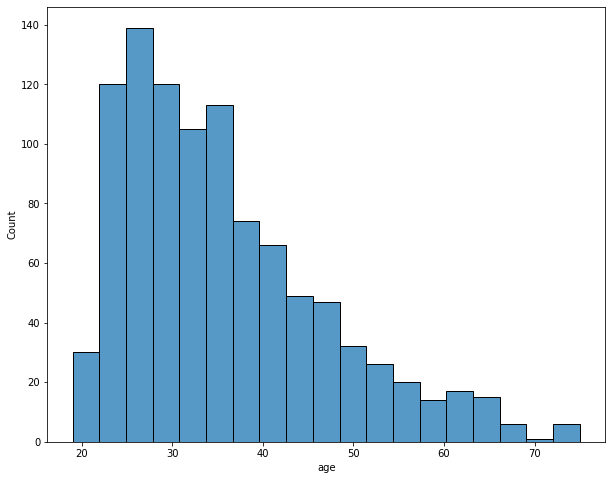

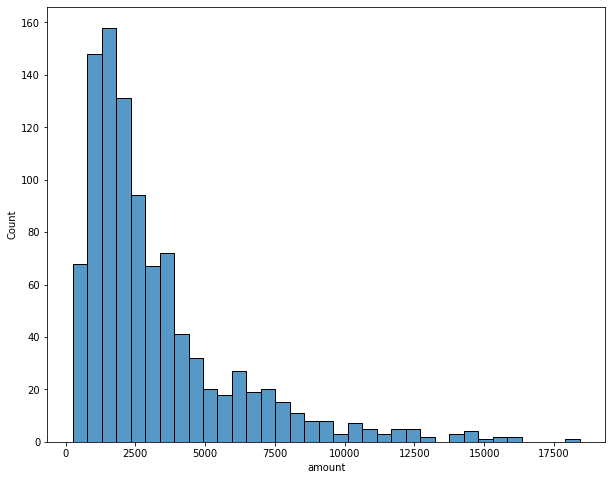

In [ ]:
## Numerical variables distribution
for col in num_columns:
    plt.figure(figsize=(10,8))
    sns.histplot(data = df, x = col)


The variable 'Age' has a heavy right skew, generated because of the lower limit at zero of the variable. 
The feature 'Amount' has the same right skew problem as the 'Age' feature. 

**Feature transformation and scaling**


In [ ]:
# Normality test for the data by using a normality test from scipy
from scipy.stats.mstats import normaltest

print('The p-value for the null hypothesis of the Age being Normally distributed is: {}'
     .format(normaltest(df.age)[1]))
print('The p-value for the null hypothesis of the Amount being Normally distributed is: {}'
     .format(normaltest(df.amount)[1]))

##The p-value for both features is extremely low and we need to transform the data and check for normallity against the transformed data to add it to the model

The p-value for the null hypothesis of the Age being Normally distributed is: 4.2989124342991835e-30
The p-value for the null hypothesis of the Amount being Normally distributed is: 1.0052374860399668e-86


In [ ]:
# Perform Log Transformation:
df['log_Age'] = np.log1p(df.age)
df['log_Amount'] = np.log1p(df.amount)

# Drop Age & Amount columns:
df.drop(['age','amount'], axis=1,inplace=True)

In [ ]:
print('The p-value for the null hypothesis of the Age being Normally distributed is: {}'
     .format(normaltest(df.log_Age)[1]))
print('The p-value for the null hypothesis of the Amount being Normally distributed is: {}'
     .format(normaltest(df.log_Amount)[1]))

The p-value for the null hypothesis of the Age being Normally distributed is: 1.1020586058096935e-11
The p-value for the null hypothesis of the Amount being Normally distributed is: 0.008601215778409289


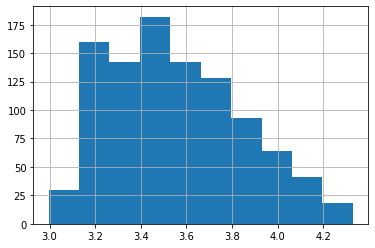

In [ ]:
df.log_Age.hist()

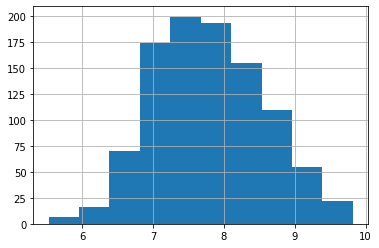

In [ ]:
df.log_Amount.hist()

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df))

**PCA**

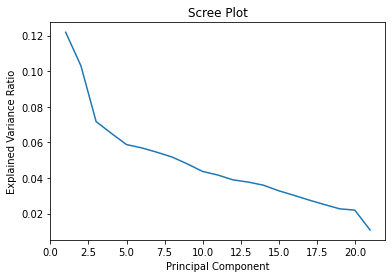

In [ ]:
# Apply PCA and plot scree plot
pca_default = PCA()
pca_default.fit(X)
plt.plot(range(1, pca_default.n_components_+1), pca_default.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In the output plot, we can see the amount of variance explained by each principal component. We can use this plot to decide on the optimal number of components to retain, which is typically the number of components that captures the "elbow" or inflection point in the plot. In this case, we can see that the scree plot has a sharp drop-off after the second component, suggesting that retaining 2 components may be sufficient to capture a large amount of the variance in the data.

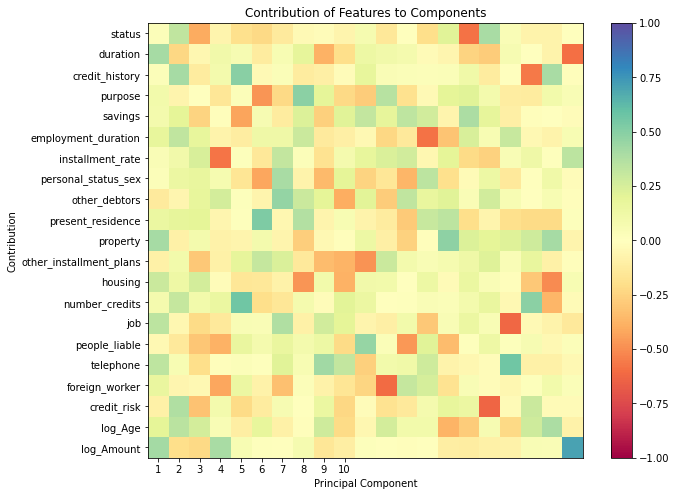

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(pca_default.components_.T,cmap="Spectral",vmin=-1,vmax=1,)
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(10), range(1, 11))
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

In matplotlib imshow function the darker the color, the more the original column contributes to the component.

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

**K-Means Clustering**

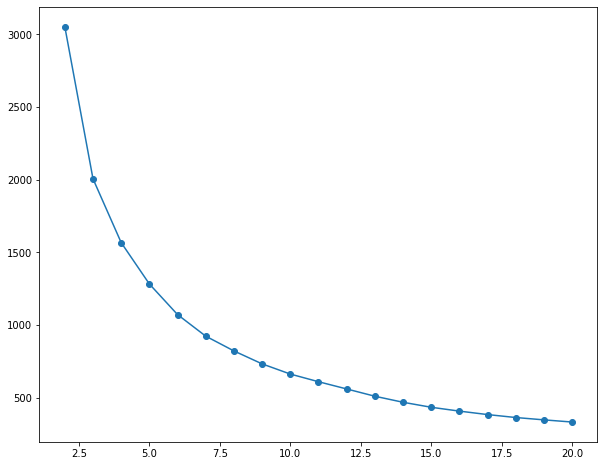

In [ ]:
# Selecting the correct number of clusters using Elbow method:
inertia = []
num_cluster = range(2,21)
for num in num_cluster:
    km = KMeans(n_clusters = num, random_state=0)
    km = km.fit(X_pca)
    inertia.append(km.inertia_)
plt.figure(figsize=(10,8))
plt.plot(num_cluster, inertia,marker='o')

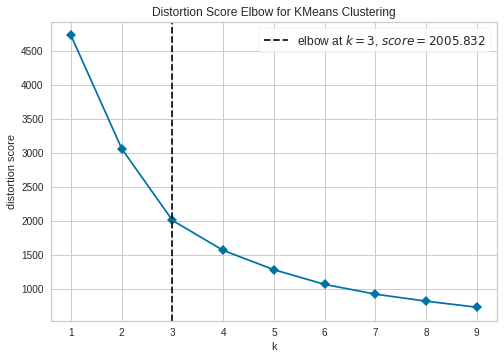

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (1,10), timings = False)
visualizer.fit(X_pca)
visualizer.show()

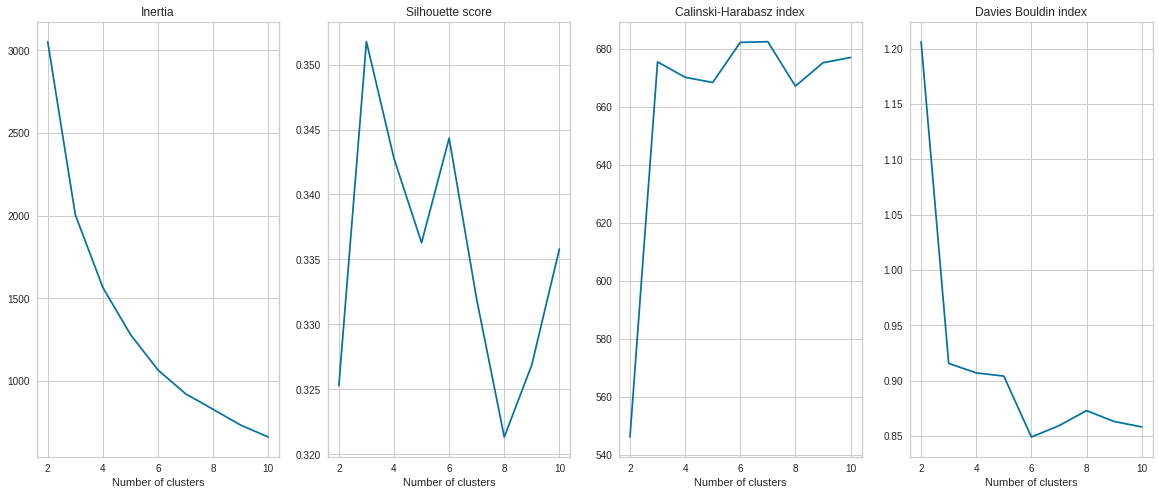

In [ ]:
inertias = []
silhouette_scores = []
calinski_scores = []
davies_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(metrics.silhouette_score(X_pca, kmeans.labels_))
    calinski_scores.append(metrics.calinski_harabasz_score(X_pca, kmeans.labels_))
    davies_scores.append(metrics.davies_bouldin_score( X_pca, kmeans.labels_))

# Plot the metrics as a function of the number of clusters
fig, axs = plt.subplots(1, 4, figsize=(20,8 ))
axs[0].plot(range(2, 11), inertias)
axs[0].set_title("Inertia")
axs[0].set_xlabel("Number of clusters")
axs[1].plot(range(2, 11), silhouette_scores)
axs[1].set_title("Silhouette score")
axs[1].set_xlabel("Number of clusters")
axs[2].plot(range(2, 11), calinski_scores)
axs[2].set_title("Calinski-Harabasz index")
axs[2].set_xlabel("Number of clusters")
axs[3].plot(range(2, 11), davies_scores)
axs[3].set_title("Davies Bouldin index")
axs[3].set_xlabel("Number of clusters")
plt.show()

Looking at the plots, there isn't an obvious "elbow" in the inertia plot, but there is a clear peak in the Calinski-Harabasz index and a maximum value in the Silhouette score at n_clusters = 3. Based on these metrics, we might conclude that 3 is the optimal number of clusters.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca)
print(f"silhouette_score for KMeans: {metrics.silhouette_score(X_pca, kmeans.labels_)}")
print(f"davies_bouldin_score for KMeans: {metrics.davies_bouldin_score(X_pca, kmeans.labels_)}")
print(f"calinski_harabasz_score for KMeans: {metrics.calinski_harabasz_score(X_pca, kmeans.labels_)}")

silhouette_score for KMeans: 0.3518508436898811
davies_bouldin_score for KMeans: 0.9143509628215032
calinski_harabasz_score for KMeans: 675.423444498798


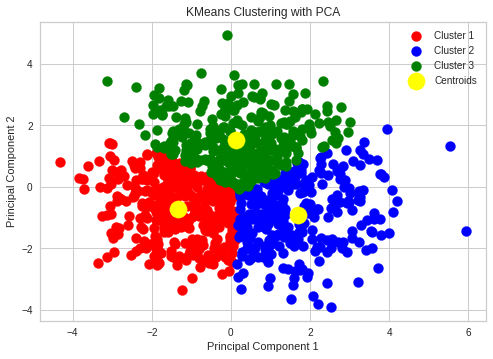

In [ ]:
plt.scatter(X_pca[kmeans.labels_==0, 0], X_pca[kmeans.labels_==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[kmeans.labels_==1, 0], X_pca[kmeans.labels_==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[kmeans.labels_==2, 0], X_pca[kmeans.labels_==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

**PCA with loss of information**

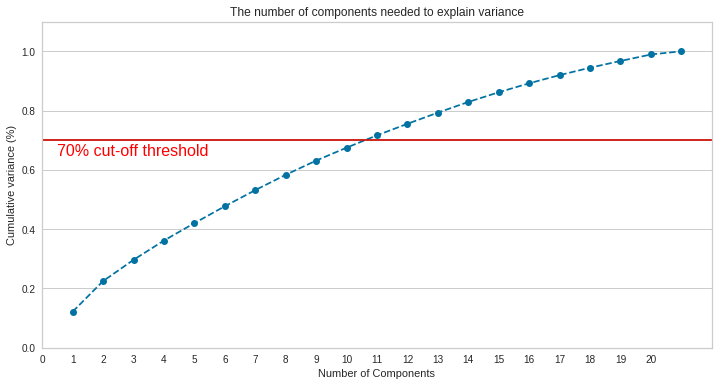

In [ ]:
pca = PCA().fit(X)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 22, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 21, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.70, color='r', linestyle='-')
plt.text(0.5, 0.65, '70% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
pca_with_loss = PCA(n_components=0.7
                          ,random_state=42)
X_with_data_limits = pca_with_loss.fit_transform(StandardScaler().fit_transform(X))

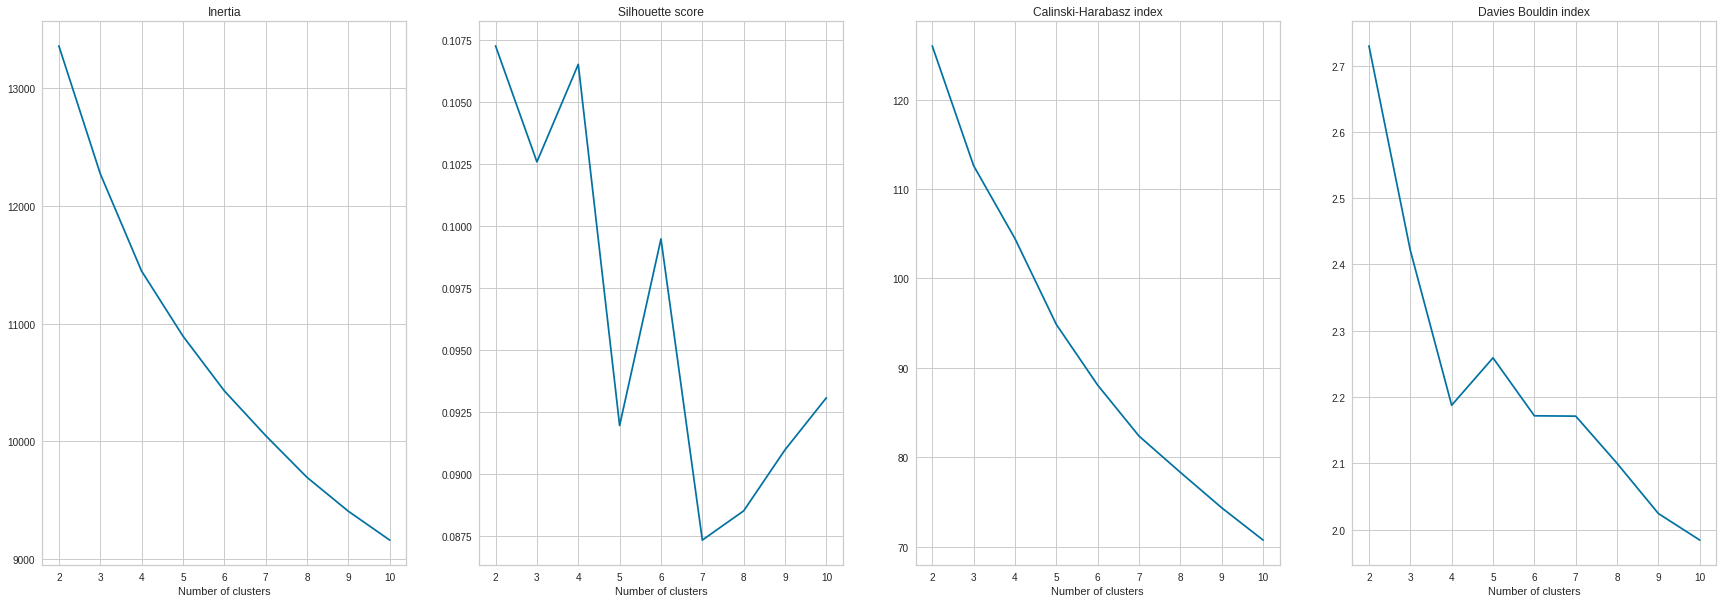

In [ ]:
## Using  scores to select the optimal number of clusters
inertias = []
silhouette_scores = []
calinski_scores = []
davies_scores = []
for n_clusters in range(2, 11):
    k2 = KMeans(n_clusters=n_clusters, random_state=42)
    k2.fit(X_with_data_limits)
    inertias.append(k2.inertia_)
    silhouette_scores.append(metrics.silhouette_score(X_with_data_limits, k2.labels_))
    calinski_scores.append(metrics.calinski_harabasz_score(X_with_data_limits, k2.labels_))
    davies_scores.append(metrics.davies_bouldin_score(X_with_data_limits, k2.labels_))

# Plot the metrics as a function of the number of clusters
fig, axs = plt.subplots(1, 4, figsize=(30,10))
axs[0].plot(range(2, 11), inertias)
axs[0].set_title("Inertia")
axs[0].set_xlabel("Number of clusters")
axs[1].plot(range(2, 11), silhouette_scores)
axs[1].set_title("Silhouette score")
axs[1].set_xlabel("Number of clusters")
axs[2].plot(range(2, 11), calinski_scores)
axs[2].set_title("Calinski-Harabasz index")
axs[2].set_xlabel("Number of clusters")
axs[3].plot(range(2, 11), davies_scores)
axs[3].set_title("Davies Bouldin index")
axs[3].set_xlabel("Number of clusters")
plt.show()

Looking at the plots, there isn't an obvious "elbow" in the inertia plot, but there is a clear peak in the Calinski-Harabasz index and a maximum value in the Silhouette score at n_clusters = 4. Based on these metrics, we might conclude that 4 is the optimal number of clusters.

In [ ]:
km = KMeans(n_clusters=4,random_state=42)
km.fit(X_with_data_limits)
print(f"silhouette_score for KMeans: {metrics.silhouette_score(X_with_data_limits, km.labels_)}")
print(f"davies_bouldin_score for KMeans: {metrics.davies_bouldin_score(X_with_data_limits, km.labels_)}")
print(f"calinski_harabasz_score for KMeans: {metrics.calinski_harabasz_score(X_with_data_limits, km.labels_)}")


silhouette_score for KMeans: 0.10651832255501892
davies_bouldin_score for KMeans: 2.1875656777882195
calinski_harabasz_score for KMeans: 104.4599184144172


**t-SNE**

In this example, I want to experiment based on prior knowledge of the dataset.
In this specific example, we choose n_clusters=2 in KMeans because the original dataset has two classes (good or bad credit risk) and we want to see if the KMeans algorithm can separate the data into two distinct groups based on their similarity in the reduced two-dimensional space obtained from PCA.

The choice of the number of clusters in KMeans can be somewhat arbitrary and may require some experimentation or a more systematic approach to choose the optimal number of clusters. In this case, since we know that the original dataset has two classes, we can start by setting the number of clusters to two and then evaluate the results to see if the clusters make sense.

In [ ]:
features_df = df.drop('credit_risk', axis=1)
y = df['credit_risk'].astype(int)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df)


In [ ]:
ts = TSNE(learning_rate='auto', init='random')
X_tsne = ts.fit_transform(X_scaled)

Text(0, 0.5, 'Embedding 2')

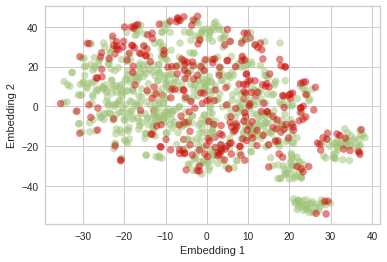

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["rg"[j] for j in y] 
scat = ax.scatter(
X_tsne[:, 0],
X_tsne[:, 1],
c=colors,
alpha=0.5)
ax.set_xlabel("Embedding 1")
ax.set_ylabel("Embedding 2")


Since TSNE is very sensitive to the value of perplexity, we select the optimal

Optimal perplexity for t-SNE: 50


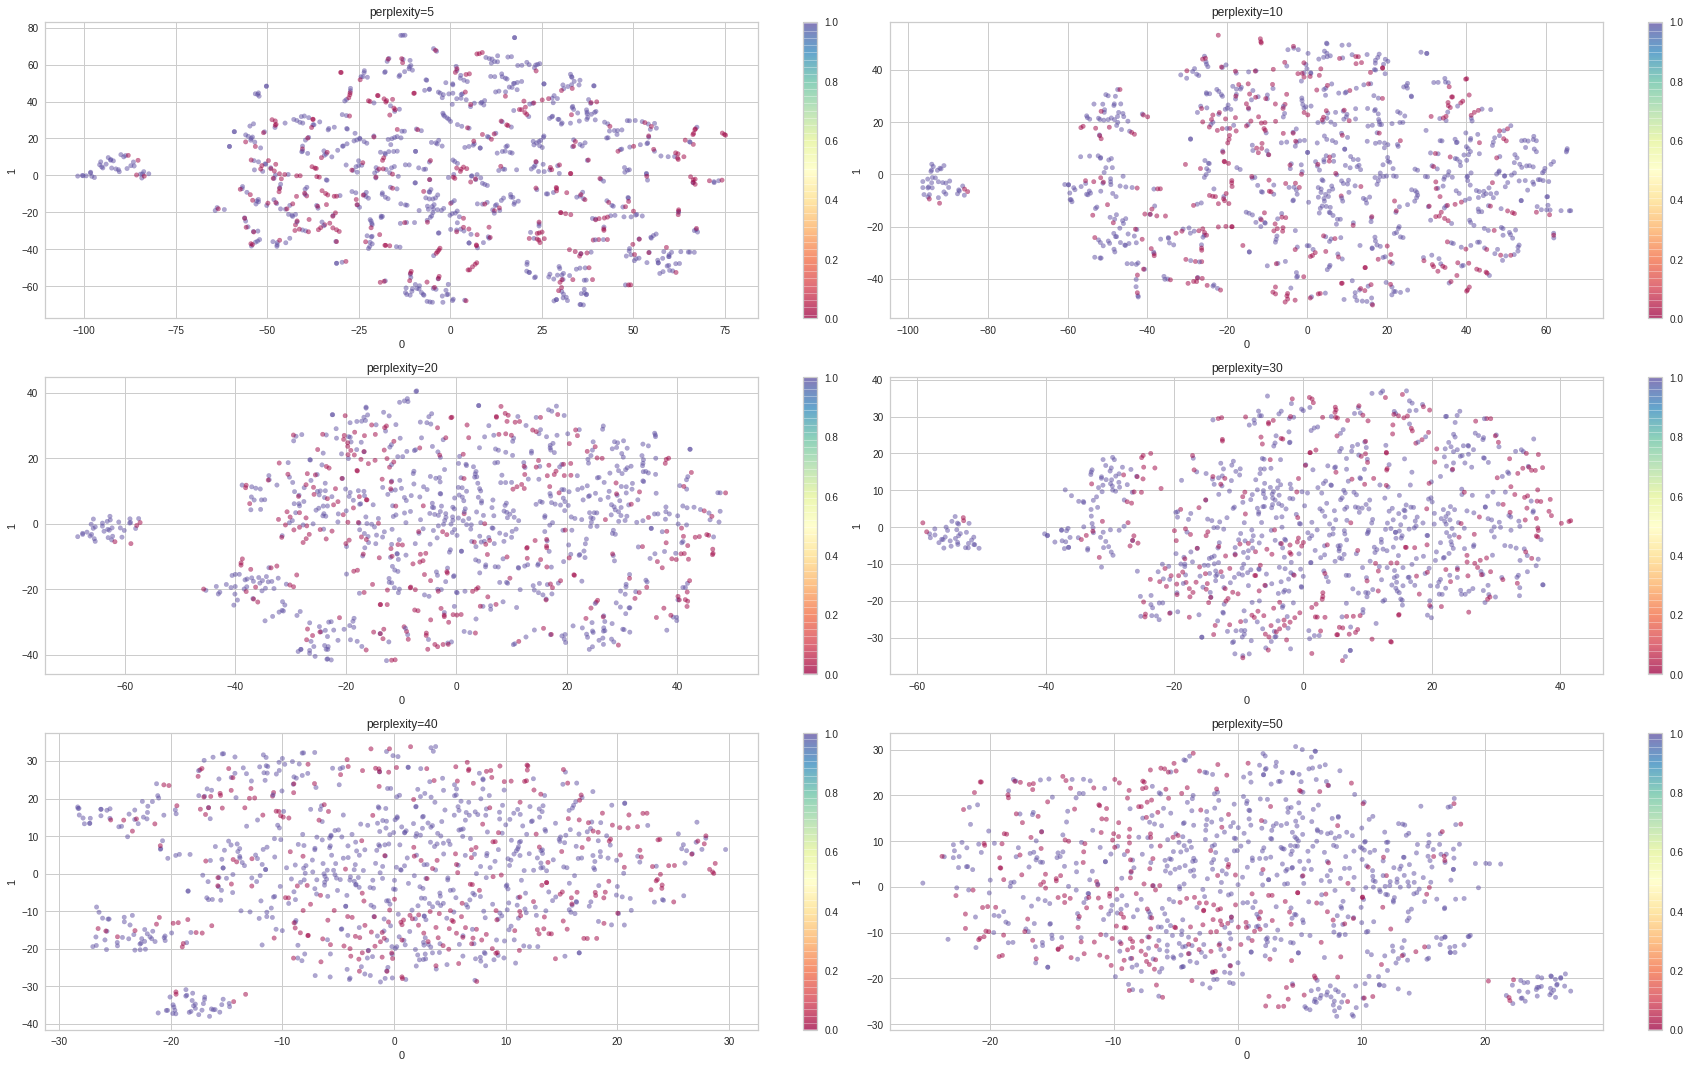

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(25, 15))
axes = axes.reshape(6)
scores = []
perplexities = [5, 10, 20, 30, 40, 50]
for i, n in enumerate(perplexities):
  ax = axes[i]
  t = TSNE(random_state=42, perplexity=n, learning_rate='auto', init='random')
  X_tsne = t.fit_transform(X_scaled)
  score = metrics.silhouette_score(X_tsne, y)
  scores.append(score)
  pd.DataFrame(X_tsne).plot(kind="scatter",x=0,y=1,ax=ax,cmap="Spectral",c=y,alpha=0.5,)
  ax.set_title(f"perplexity={n}")
  plt.tight_layout()
best_perplexity = perplexities[np.argmax(scores)]
print(f"Optimal perplexity for t-SNE: {best_perplexity}")  

In [ ]:
t = TSNE(random_state=42, perplexity=50, learning_rate='auto', init='random')
X_tsne = t.fit_transform(X_scaled)
km = KMeans(n_clusters=2,random_state=42)
km.fit(X_tsne)
print(f"silhouette_score for TSNE/KMeans: {metrics.silhouette_score(X_tsne, km.labels_)}")
print(f"davies_bouldin_score for TSNE/KMeans: {metrics.davies_bouldin_score(X_tsne, km.labels_)}")
print(f"calinski_harabasz_score for TSNE/KMeans: {metrics.calinski_harabasz_score(X_tsne, km.labels_)}")


silhouette_score for TSNE/KMeans: 0.38063472509384155
davies_bouldin_score for TSNE/KMeans: 1.0330352138532612
calinski_harabasz_score for TSNE/KMeans: 773.1004605438111


**DBSCAN**

In [ ]:
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(2, 10)
best_eps = None
best_min_samples = None
best_score = -1
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_pca)
        labels = dbscan.labels_
        if len(set(labels)) > 1:
            score = metrics.silhouette_score(X_pca, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Optimal eps for DBSCAN: {best_eps}")
print(f"Optimal min_samples for DBSCAN: {best_min_samples}")

Optimal eps for DBSCAN: 0.8
Optimal min_samples for DBSCAN: 2


In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=2)
labels = dbscan.fit_predict(X_pca)

In [ ]:
print(f"silhouette_score for DBSCAN: {metrics.silhouette_score(X_pca, dbscan.labels_)}")
print(f"davies_bouldin_score for DBSCAN: {metrics.davies_bouldin_score(X_pca, dbscan.labels_)}")
print(f"calinski_harabasz_score for DBSCAN: {metrics.calinski_harabasz_score(X_pca, dbscan.labels_)}")


silhouette_score for DBSCAN: 0.5091164688108889
davies_bouldin_score for DBSCAN: 1.3278741493104824
calinski_harabasz_score for DBSCAN: 10.87851206088453


**Agglomerative (Hierarchical) Clustering**

Dendrogram shows all the clusters (from one to the size of the samples). The heights represent how simi‐ lar clusters are when they are joined. 

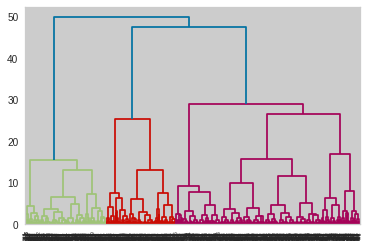

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
dend = hierarchy.dendrogram(hierarchy.linkage(X_pca, method="ward"))

For ordeing to find how many clusters are in the data, we  “cut” a horizontal line through where it would cross the tallest lines.
In this case we have 4 clusters.

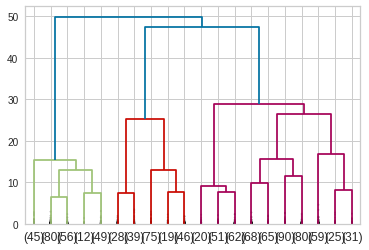

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
dend = hierarchy.dendrogram(hierarchy.linkage(X_pca, method="ward"),truncate_mode="lastp",p=20,show_contracted=True)

In [ ]:
ag = AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward",)

In [ ]:
ag.fit(X_pca)

AgglomerativeClustering(n_clusters=4)

In [ ]:
print(f"silhouette_score for AgglomerativeClustering: {metrics.silhouette_score(X_pca, ag.labels_)}")
print(f"davies_bouldin_score for AgglomerativeClustering: {metrics.davies_bouldin_score(X_pca, ag.labels_)}")
print(f"calinski_harabasz_score for AgglomerativeClustering: {metrics.calinski_harabasz_score(X_pca, ag.labels_)}")


silhouette_score for AgglomerativeClustering: 0.2524591524308905
davies_bouldin_score for AgglomerativeClustering: 1.0388202886497284
calinski_harabasz_score for AgglomerativeClustering: 480.0533497850096
